In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import re

In [2]:
def get_mean_angle_train_data(filename):
    train_data = pd.read_csv(filename, header=None)
    mean_angle = train_data.iloc[:, 1:].sum(axis=1) / train_data[0]
    # # replace nan with 0
    # mean_angle = mean_angle.fillna(0)
    return mean_angle

In [3]:
# get data
train_data_files = glob.glob(os.path.join("../data/train_thetas/", "*.csv"))
train_data_files.sort(key=lambda f: int(re.sub('\D', '', f)))
train_data = [get_mean_angle_train_data(f) for f in train_data_files]# shape 15000 * (1600)

target_train_files = glob.glob(os.path.join("../data/training_ground_truth_files", "*_ground"))
target_train_files.sort(key=lambda f: int(re.sub('\D', '', f)))
target_train = [pd.read_csv(f, header=None, sep=' ', dtype="int8").to_numpy().flatten() for f in target_train_files] # shape 15000 * (40, 40)


In [4]:
first_file = pd.read_csv(train_data_files[0], header=None)
first_file.head()

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,3,0.004409,0.002461,0.001207,0.000000,0.000000,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.009575,0.003809,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5,0.007918,0.005725,0.005614,0.005240,0.003752,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,0.005603,0.003863,0.003765,0.002105,0.002085,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6,0.006240,0.005391,0.004977,0.003180,0.003062,0.00064,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


0       3
1       2
2       5
3       5
4       6
       ..
1595    9
1596    4
1597    2
1598    3
1599    3
Name: 0, Length: 1600, dtype: int64


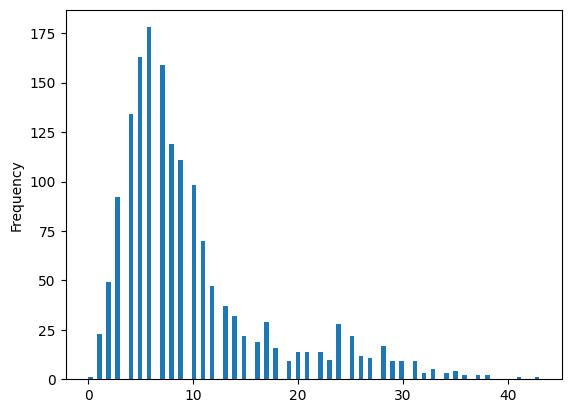

In [5]:
# plot first column histogram
first_column = first_file[0]
print(first_column)

first_column.plot.hist(bins=100)
plt.show()

In [6]:
# add a column to first_file named 'mean_angle' equal to sum of all but first columns divided by first column

first_file['mean_angle'] = first_file.iloc[:, 1:].sum(axis=1) / first_file[0]

mean_angle = first_file['mean_angle']

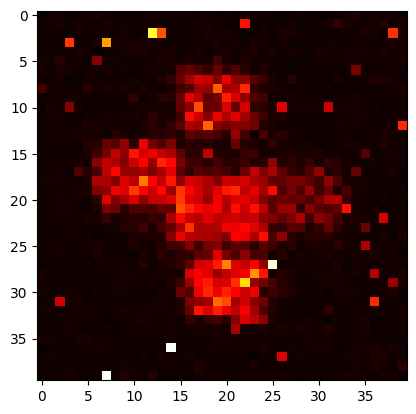

In [7]:
# reshape mean_angle to 40x40
mean_angle = mean_angle.values.reshape(40, 40)

# plot mean_angle as a heatmap
plt.imshow(mean_angle, cmap='hot', interpolation='nearest')
plt.show()

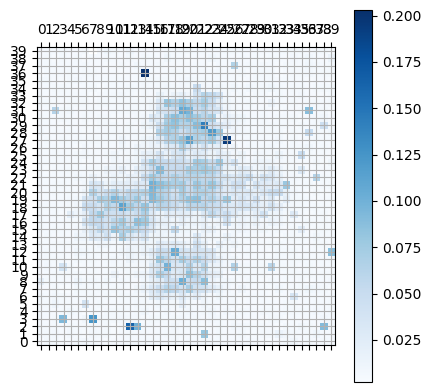

In [8]:
plt.matshow(mean_angle, cmap=plt.cm.Blues, origin='lower')
plt.colorbar()

ax = plt.gca();
ax.set_xticks(np.arange(0, 40, 1));
ax.set_yticks(np.arange(0, 40, 1));

plt.grid()
plt.show()

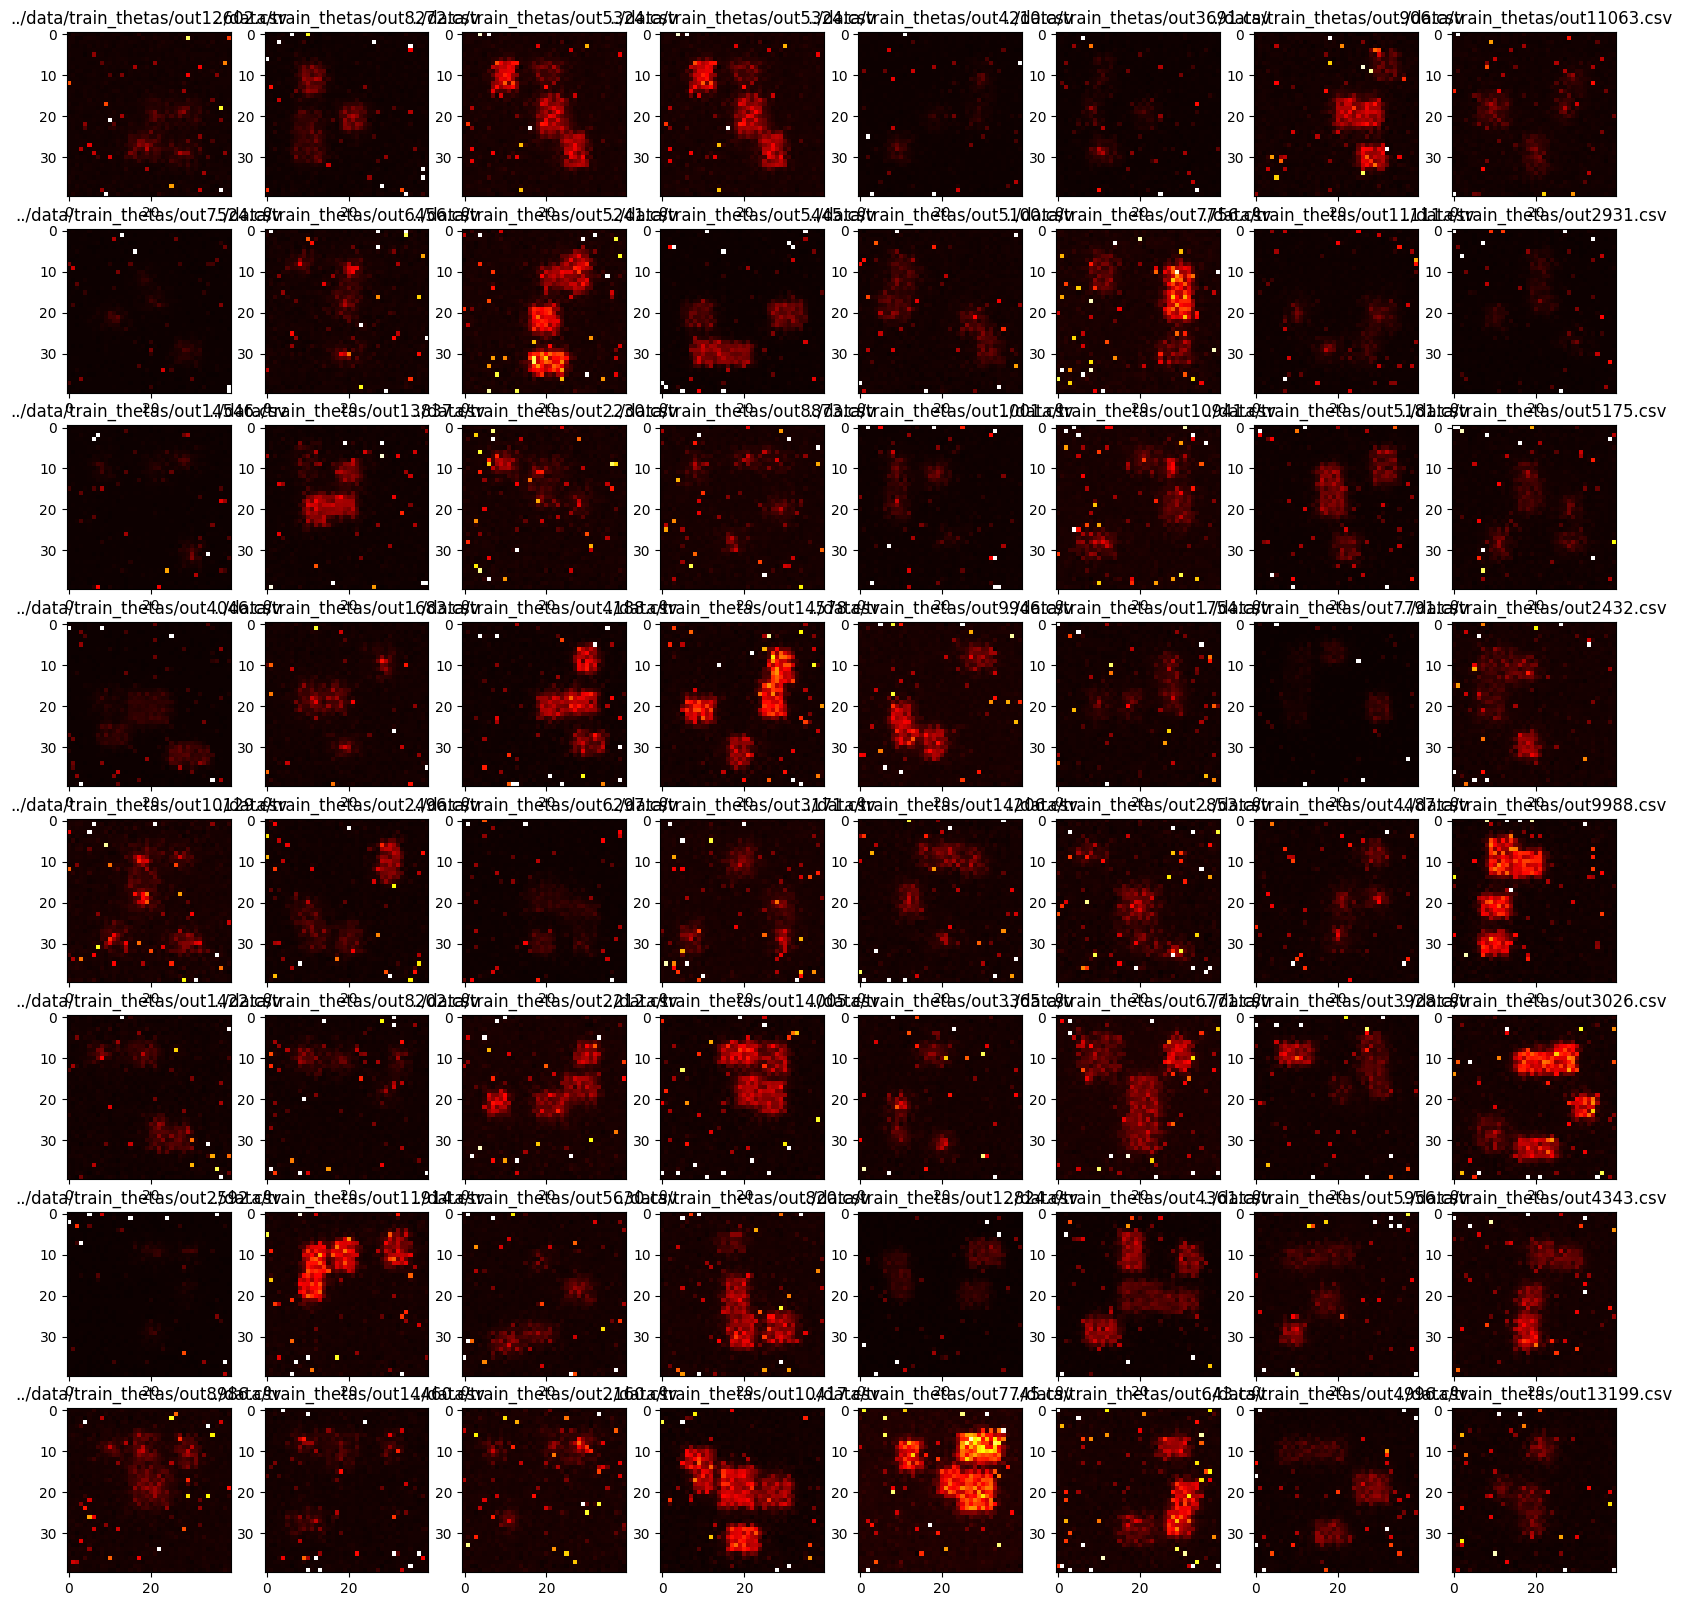

In [9]:
# visualise heatmaps of mean_angle from 64 random files in a grid

# create a list of 64 random files
random_files = np.random.choice(train_data_files, 64)

# create a list of 64 mean_angles
mean_angles = []

for file in random_files:
    df = pd.read_csv(file, header=None)
    df['mean_angle'] = df.iloc[:, 1:].sum(axis=1) / df[0]
    mean_angle = df['mean_angle']
    mean_angle = mean_angle.values.reshape(40, 40)
    mean_angles.append(mean_angle)

# plot mean_angles as a grid of heatmaps
fig, axes = plt.subplots(8, 8, figsize=(20, 20))
for i, ax in enumerate(axes.flat):
    ax.imshow(mean_angles[i], cmap='hot', interpolation='nearest')
    ax.set_title(random_files[i])
    
plt.show()



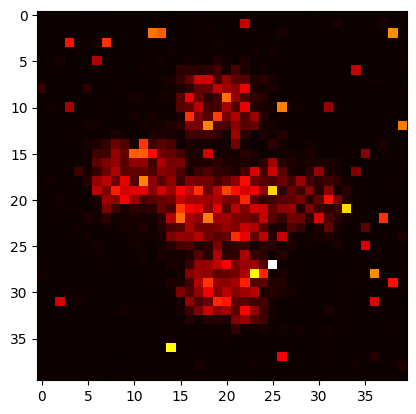

In [10]:
# add a column to first_file named 'max_angle' equal to max of 1 to 11 column

first_file['max_angle'] = first_file.iloc[:, 1:11].max(axis=1)

max_angle = first_file['max_angle']

# reshape max_angle to 40x40
max_angle = max_angle.values.reshape(40, 40)

# plot max_angle as a heatmap
plt.imshow(max_angle, cmap='hot', interpolation='nearest')
plt.show()

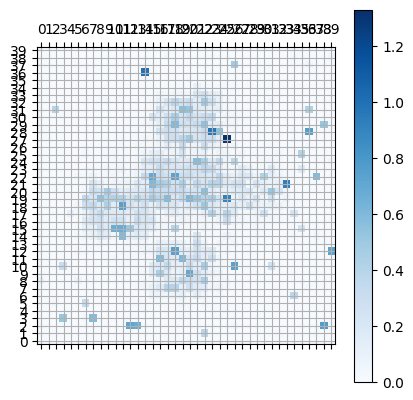

In [11]:
plt.matshow(max_angle, cmap=plt.cm.Blues, origin='lower')
plt.colorbar()

ax = plt.gca();
ax.set_xticks(np.arange(0, 40, 1));
ax.set_yticks(np.arange(0, 40, 1));

plt.grid()
plt.show()

In [12]:
# plot average angle of each class as a bar chart

classes = {}

for file_idx in range(len(train_data)):
    train_grid = train_data[file_idx]
    target_grid = target_train[file_idx]

    for grid_idx in range(len(train_grid)):
        angle = train_grid[grid_idx]
        target = target_grid[grid_idx]
        
        if np.isnan(angle):
            continue

        if target not in classes:
            classes[target] = [angle]
        else:
            classes[target].append(angle)

for key in classes:
    classes[key] = np.mean(classes[key])

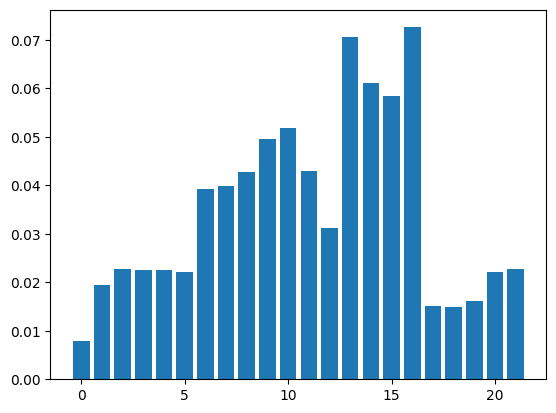

In [13]:
plt.bar(classes.keys(), classes.values())
plt.show()

In [14]:
# map target_train using classes dictionary
means_target_train = np.zeros((len(target_train), len(target_train[0])))

for file_idx in range(len(target_train)):
    target_grid = target_train[file_idx]

    for grid_idx in range(len(target_grid)):
        target = target_grid[grid_idx]
        means_target_train[file_idx][grid_idx] = classes[target]



In [15]:
print(means_target_train[0][0:10])

[0.00781802 0.00781802 0.00781802 0.00781802 0.00781802 0.00781802
 0.00781802 0.00781802 0.00781802 0.00781802]


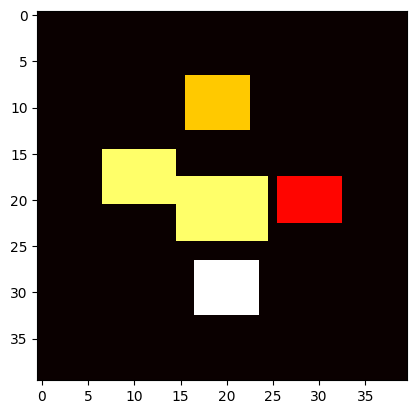

In [16]:
# reshape mean_targets_0 to 40x40
mean_targets_0 = means_target_train[0].reshape(40, 40)

# plot mean_angle as a heatmap
plt.imshow(mean_targets_0, cmap='hot', interpolation='nearest')
plt.show()

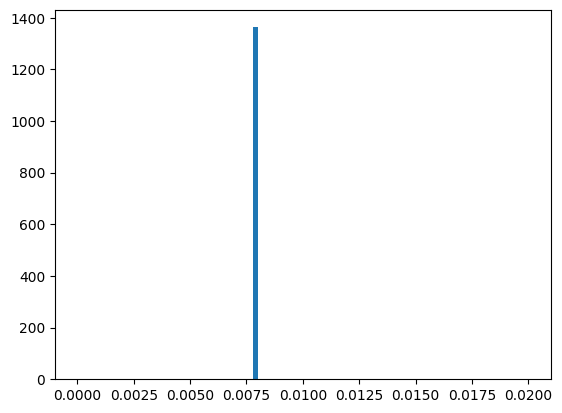

In [17]:
# make histogram of mean_targets_0
plt.hist(mean_targets_0.flatten(), bins=100, range=(0, 0.02))
plt.show()

In [18]:
# print value counts of mean_targets_0
print(pd.Series(mean_targets_0.flatten()).value_counts())

0.007818    1363
0.061146     118
0.049636      42
0.070692      42
0.031217      35
dtype: int64


In [19]:
# print value counts of target_train
print(pd.Series(np.array(target_train).flatten()).value_counts())

0     21343461
18      257572
19      252841
17      245083
21      242929
20      242900
13       99313
15       98718
14       95843
16       95759
7        94372
8        92507
10       92093
9        90844
4        86564
12       84125
6        83331
5        82025
11       81152
2        80804
3        79498
1        78266
dtype: int64


In [20]:
test = [pd.read_csv(f, header=None, sep=' ', dtype="int8").to_numpy().flatten() for f in target_train_files[0:10]]

In [21]:
# print value counts of test
print(pd.Series(np.array(test).flatten()).value_counts())

0     14252
9       248
17      218
14      163
18      161
21      156
15      154
20      149
19      129
13       93
8        93
5        65
11       42
12       35
6        30
10        7
7         5
dtype: int64


In [22]:
print(target_train[1])

[0 0 0 ... 0 0 0]


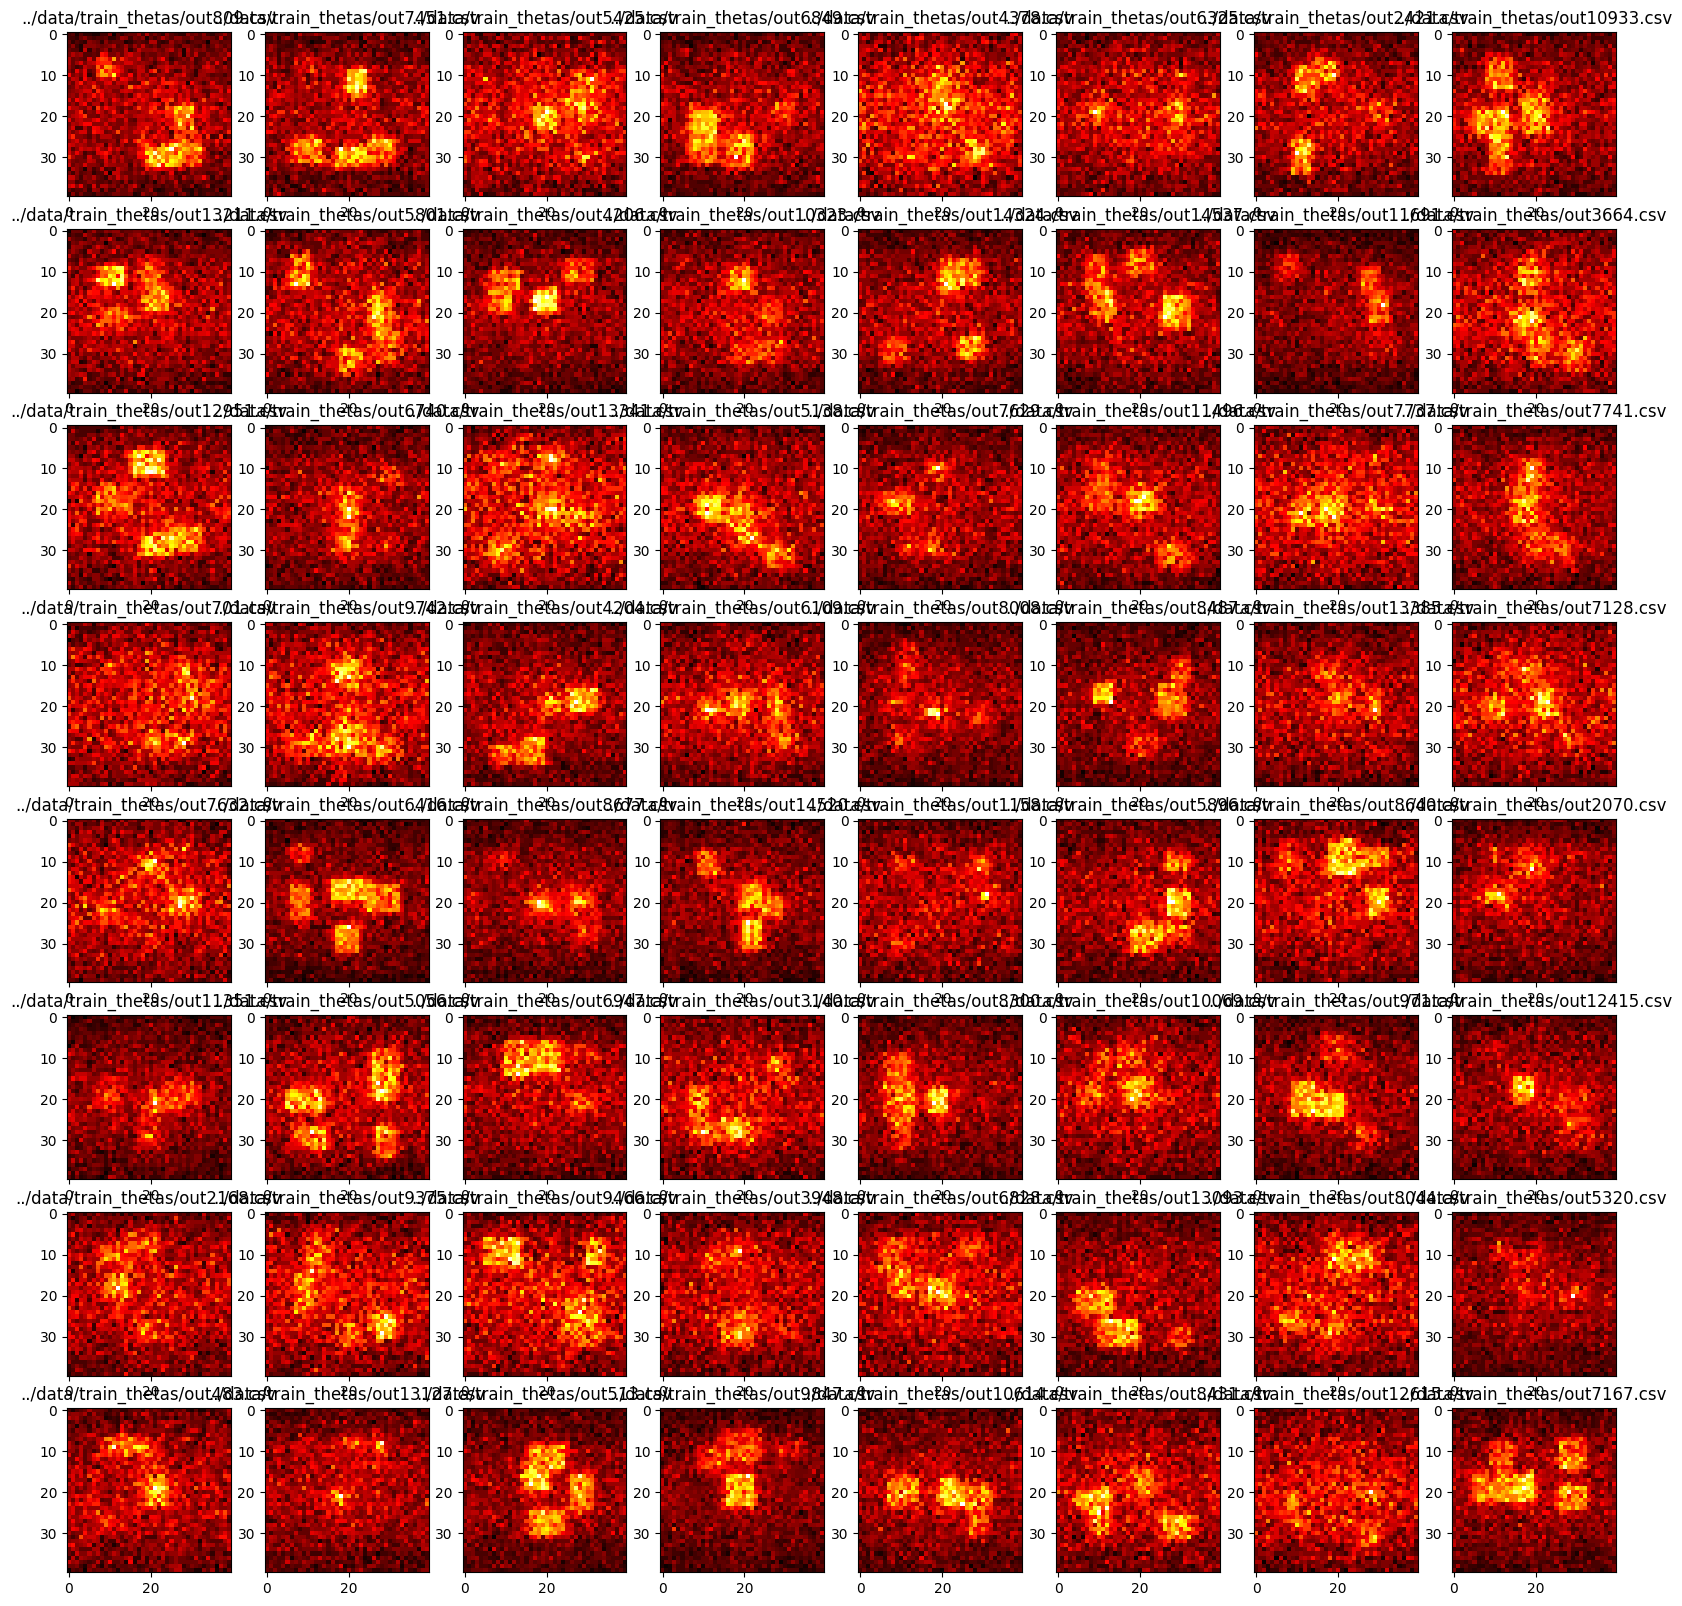

In [24]:
# visualise heatmaps of 64 random counts_grids

# create a list of 64 random files
random_files = np.random.choice(train_data_files, 64)

# create a list of 64 counts_grids
counts = [pd.read_csv(f, header=None)[0] for f in random_files]
counts_grids = [count.values.reshape(40, 40) for count in counts]

# plot counts_grids as a grid of heatmaps
fig, axes = plt.subplots(8, 8, figsize=(20, 20))
for i, ax in enumerate(axes.flat):
    ax.imshow(counts_grids[i], cmap='hot', interpolation='nearest')
    ax.set_title(random_files[i])

plt.show()


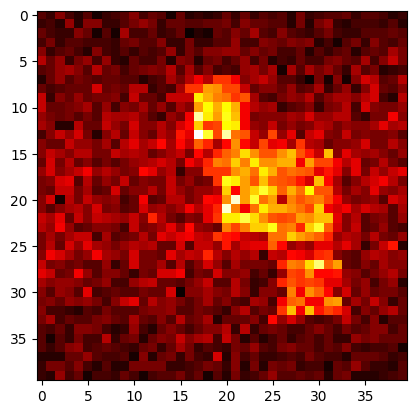

In [25]:
# visualise heatmaps of 1 random counts_grid

# create a list of 1 random file
random_file = np.random.choice(train_data_files, 1)

# create a list of 1 counts_grid
count = pd.read_csv(random_file[0], header=None)[0]
count_grid = count.values.reshape(40, 40)

# plot counts_grid as a heatmap
plt.imshow(count_grid, cmap='hot', interpolation='nearest')
plt.show()

In [27]:
np.set_printoptions(threshold=np.inf)
print(count_grid)

[[ 5  3  8  4  2  5  1  3  4  5  8  4  6  5  1  6  2  3  2  3  6  3  6  3
   5  4  5  2  7  3  4  5  5  6  3  5  5  4  2  3]
 [ 3  4  2  9  2  8  8  3  3  5  7  9  7  3  6  6  5  5  6  6  7  4  8  6
   6  5  5  2  7  2  7  9  3  2  4  4  4  3  5  2]
 [ 6  4  3  3  8  6  1  5  1 10  4  4  6  3  4  6  0  2  1  6  5  8  6 10
   5  4  8  5  4  3  5  7  4  3  3  5  5  5  6  5]
 [ 4  7  3  5  5  4  4  4  3  6  7  5  5  8  3  3  7  3  3  5  5  9  4  4
   8  7  6  8  7  8  2  4  1  5  7  3  8  5  4  6]
 [ 8  3  5  6  4  2  8  4  3  5  3  5  4  5  9  3  7  5  8  8  9  9  6  8
   6  7  4  4  6  2  5  3  5  6  2  5  6  5 10  7]
 [11  6  9  3  7  9  4  9  3  2  6  4  4  7  2  8  7  2  6  7  4  6  9  4
   7  2  4  3  6  4  4  7  8  6  5 10  4  8 12  7]
 [ 5  6  9 10  8  5 11  6  7  4  6  7  8  7 11  5 10  5  8  4  5  4  9 10
   7 10  1 10  5 10  7  9  6  3 10  5  7  2  3  4]
 [ 2  6  9  5  7  6  5  6  6  5  5  2  4  5 10  7 11 15 11 19 19 15  8 10
  12  9  5  5  3  0  7  1  8  1  8 13 11  5  6 11]


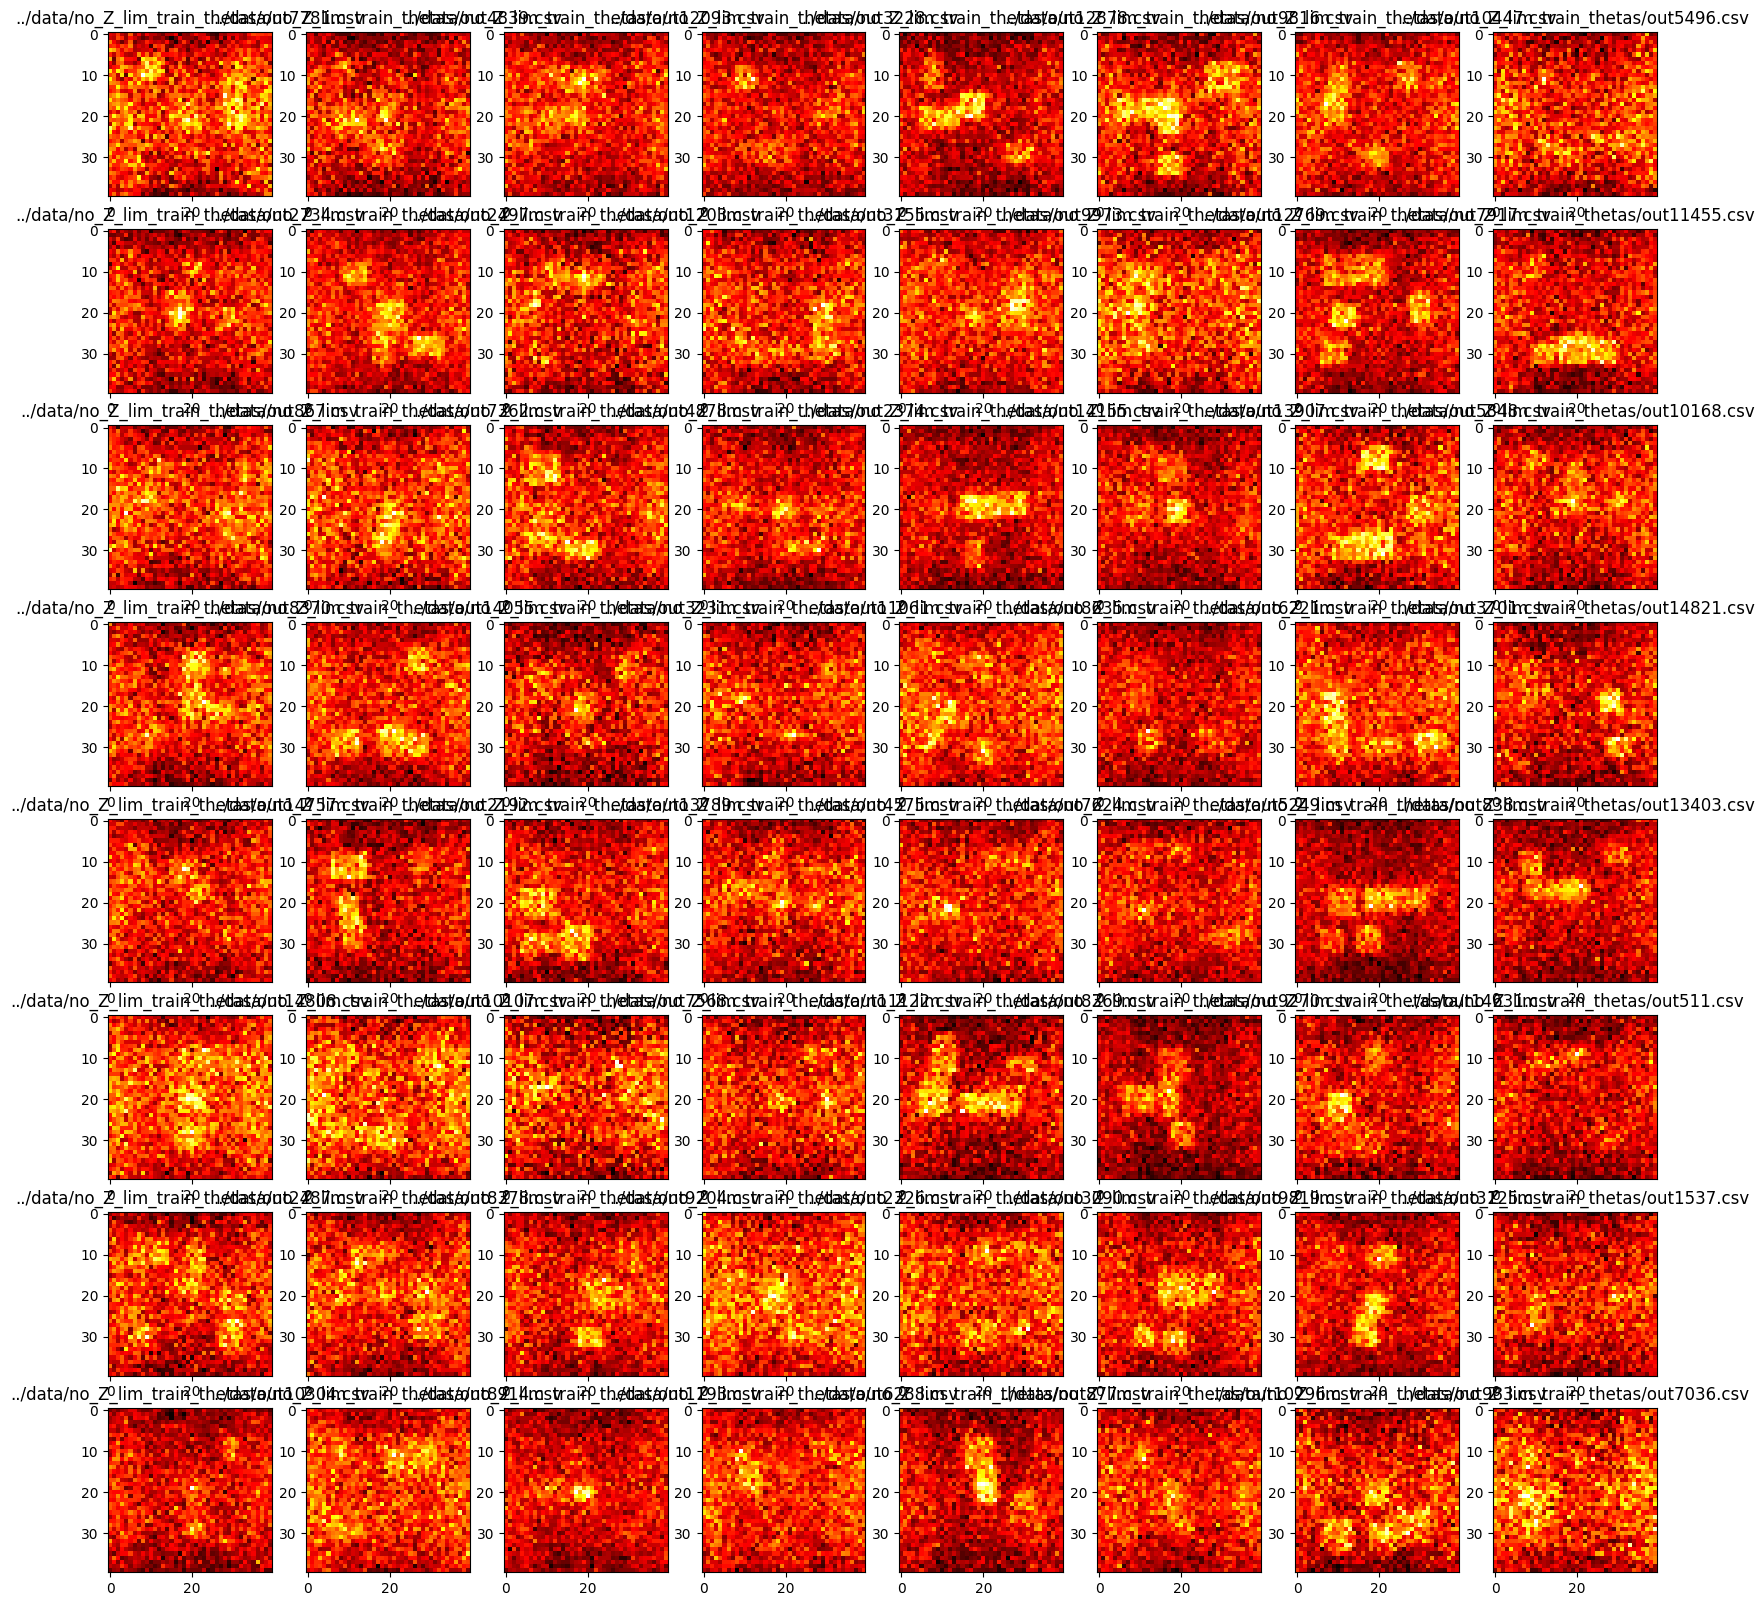

In [28]:
no_Z_lim_train_data_files = glob.glob(os.path.join("../data/no_Z_lim_train_thetas/", "*.csv"))
random_files = np.random.choice(no_Z_lim_train_data_files, 64)

# create a list of 64 counts_grids
counts = [pd.read_csv(f, header=None)[0] for f in random_files]
counts_grids = [count.values.reshape(40, 40) for count in counts]

# plot counts_grids as a grid of heatmaps
fig, axes = plt.subplots(8, 8, figsize=(20, 20))
for i, ax in enumerate(axes.flat):
    ax.imshow(counts_grids[i], cmap='hot', interpolation='nearest')
    ax.set_title(random_files[i])

plt.show()


In [38]:
# read 0_grid_count.txt as 40x40 numpy array
count_grid = pd.read_csv("./0_grid_count.txt", header=None, sep = ' ').values[:, :-1]
count_grid

array([[ 3.,  2.,  5.,  5.,  6.,  2.,  2.,  3.,  7.,  3.,  6.,  2.,  2.,
         9.,  1.,  4.,  7., 10.,  4.,  5.,  2.,  7.,  7.,  9.,  3.,  7.,
         5.,  7.,  7.,  3.,  3.,  1.,  5.,  9.,  1.,  7.,  2.,  8.,  5.,
         3.],
       [ 7.,  5.,  6.,  3.,  8.,  4.,  4.,  3.,  6.,  1.,  2.,  4.,  4.,
         9.,  4.,  4.,  9.,  6.,  6.,  1.,  2.,  6.,  5.,  5.,  6.,  2.,
         2.,  4.,  5.,  4.,  4.,  8.,  4.,  4.,  7., 10.,  8.,  5.,  6.,
         4.],
       [ 4.,  8.,  5.,  6.,  3.,  6.,  5.,  3.,  4.,  4.,  1.,  5.,  5.,
         7.,  5.,  5.,  8.,  5.,  5.,  5.,  2.,  9.,  7.,  5.,  6.,  7.,
         6.,  3.,  9.,  4.,  5.,  4.,  3.,  2.,  7.,  4.,  4.,  5.,  9.,
         6.],
       [ 5.,  6.,  7.,  6.,  4.,  8.,  4.,  5.,  5.,  4.,  6.,  3.,  7.,
         5.,  4., 10.,  4.,  2., 10.,  7.,  7.,  7.,  6.,  5.,  5.,  6.,
         4.,  2.,  4.,  5.,  4.,  9.,  7.,  6.,  6.,  2.,  7.,  5.,  1.,
         5.],
       [ 9.,  4.,  4.,  4.,  5.,  4.,  3.,  7.,  4.,  4.,  6.,  6., 

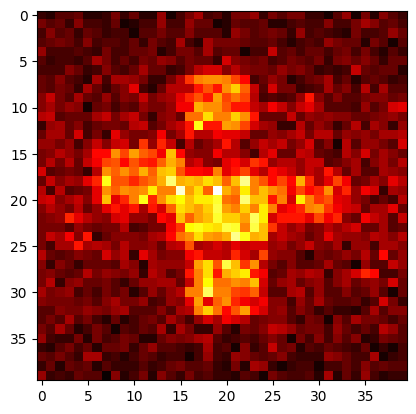

In [39]:
plt.imshow(count_grid, cmap='hot', interpolation='nearest')
plt.show()